> # **Advertising Sales Prediction**

# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **Import Dataset**

In [3]:
df = pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# **Data Preprocessing**

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
# summary statistics of data
display(df.describe())

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [10]:
df.shape

(200, 4)

In [11]:
df.duplicated().any()

False

In [12]:
duplicate_values = df.duplicated().sum()
duplicate_values

0

In [13]:
null_values = df.isna().sum()
null_values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# **Exploratory Data Analysis**

In [14]:
corr_matrix = df.corr()
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


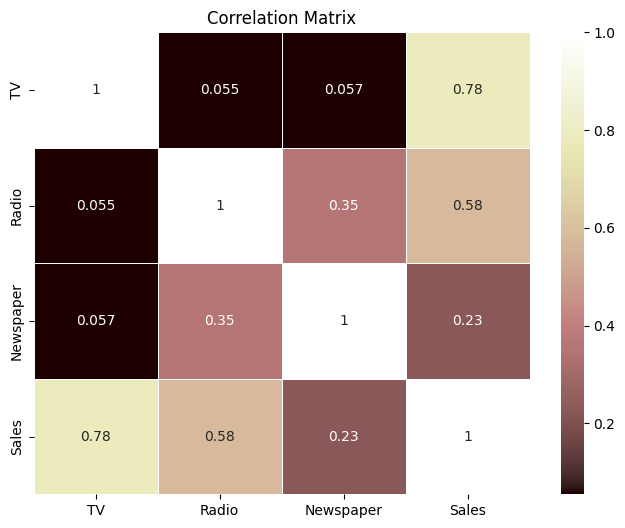

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='pink', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

> "The correlation analysis between the advertising mediums and sales revealed that TV advertising has the strongest positive relationship with sales, with a correlation coefficient of 0.78. This indicates that as companies increase their investment in TV advertisements, their sales tend to rise significantly. The high correlation suggests that TV advertising is likely a key driver of sales performance in this dataset."

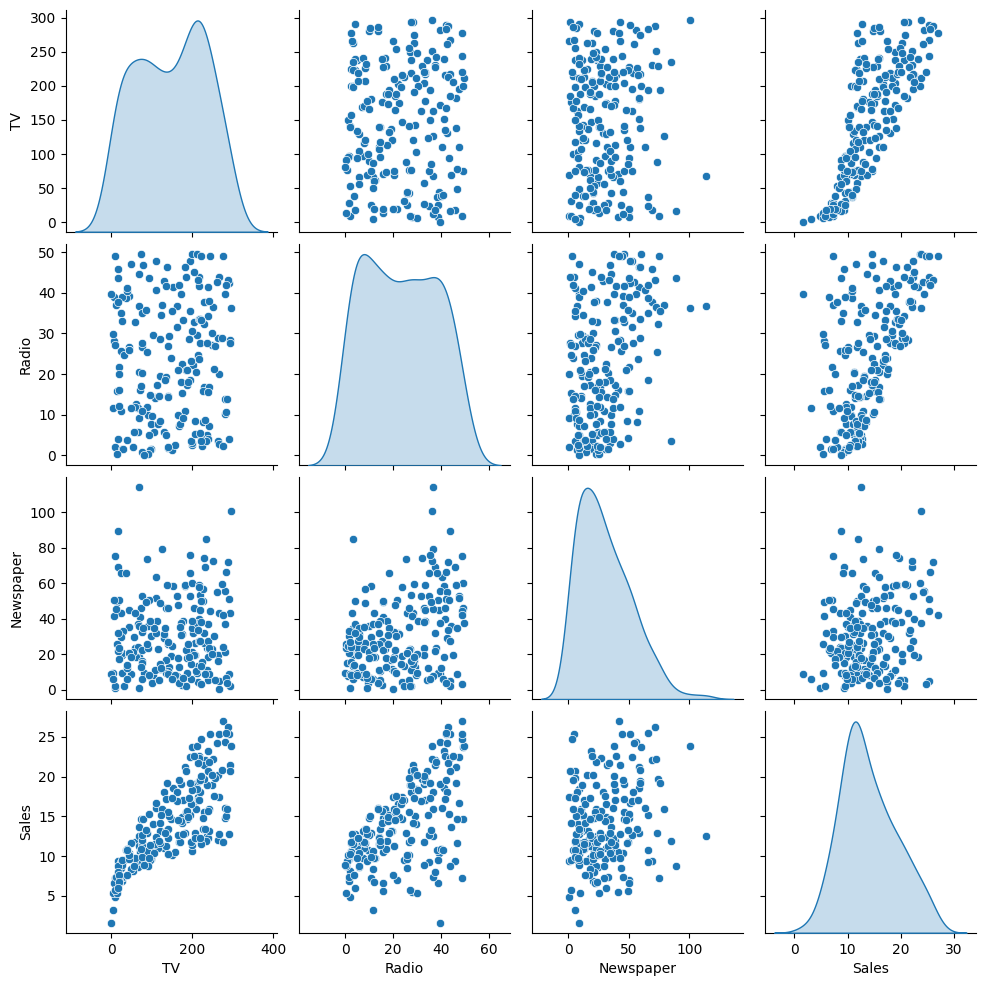

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(df, diag_kind='kde')
plt.show()

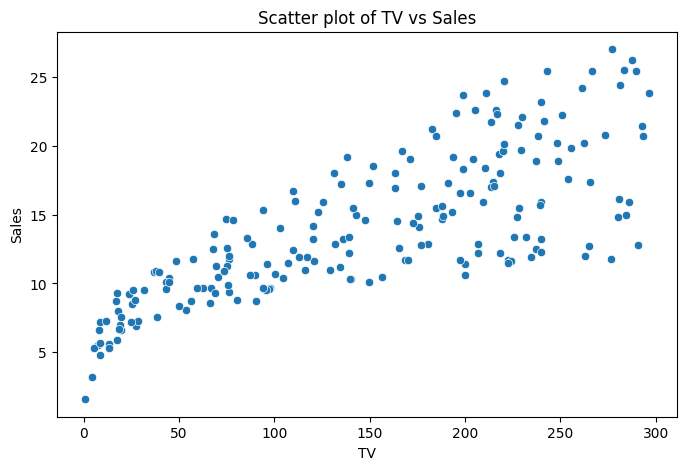

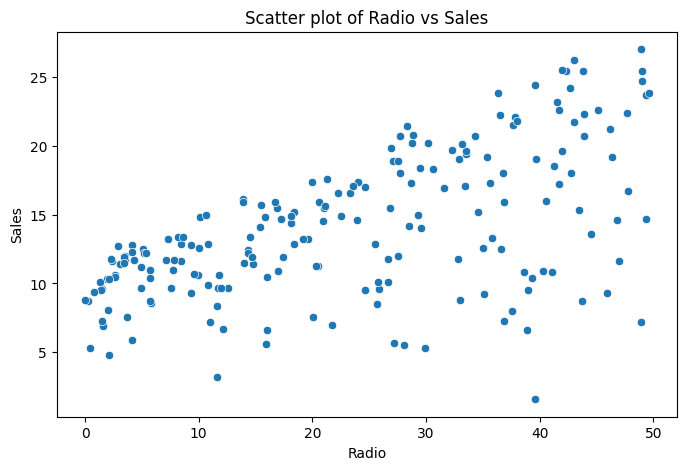

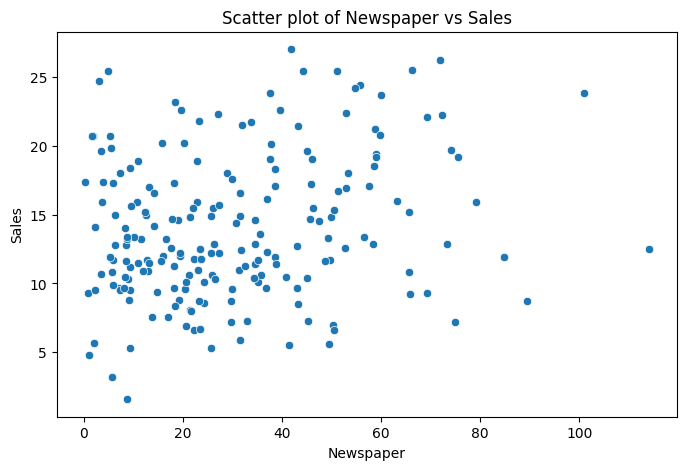

In [17]:
columns = ['TV','Radio', 'Newspaper']

for column in columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x = column, y= 'Sales', data = df)
    plt.title(f'Scatter plot of {column} vs Sales')
    plt.show()

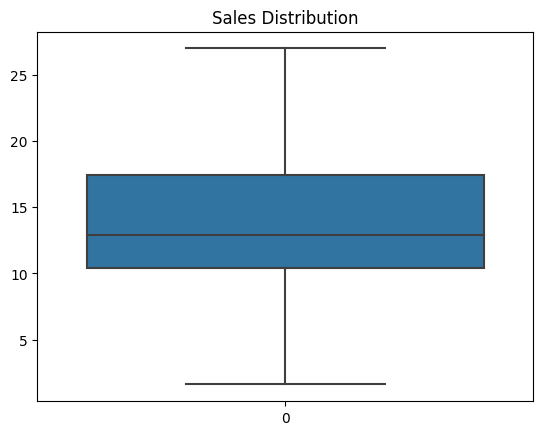

In [18]:
sns.boxplot(df['Sales'])
plt.title('Sales Distribution')
plt.show()

# **Model Building**

In [19]:
X = df.drop(['Sales'],axis=1)
y = df['Sales']

In [20]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [23]:
def evaluation(y, predictions):
    return {
        'MAE': mean_absolute_error(y, predictions),
        'MSE': mean_squared_error(y, predictions),
        'RMSE': np.sqrt(mean_squared_error(y, predictions)),
        'R-squared': r2_score(y, predictions)
    }

## **Linear Regression Model**

In [24]:
from sklearn.linear_model import LinearRegression

model_name = "LinearRegression"

# Build a Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Predict using the model on the data
predictions = lin_reg.predict(X_test)

# Function call to Evaluate results of 'MAE', 'MSE', 'RMSE', 'R-squared'
evaluation_results_l = evaluation(y_test, predictions)

evaluation_results_l["Model"] = model_name


models = pd.DataFrame([evaluation_results_l])

print("Evaluation Results for", model_name)
print('-'*30)
for metric, value in evaluation_results_l.items():
    print(f"{metric}: {value}")

Evaluation Results for LinearRegression
------------------------------
MAE: 1.5116692224549086
MSE: 3.79679723671522
RMSE: 1.9485372043446387
R-squared: 0.8609466508230368
Model: LinearRegression


## **Random Forest Model**

In [25]:
from sklearn.ensemble import RandomForestRegressor

model_name = "RandomForest"

rand_for = RandomForestRegressor(n_estimators=100, random_state=0)

rand_for.fit(X_train, y_train)

predictions = rand_for.predict(X_test)

evaluation_results_r = evaluation(y_test, predictions)


evaluation_results_r["Model"] = model_name


models = pd.DataFrame([evaluation_results_r])

print("Evaluation Results for", model_name)
print('-'*30)
for metric, value in evaluation_results_r.items():
    print(f"{metric}: {value}")

Evaluation Results for RandomForest
------------------------------
MAE: 0.5966333333333327
MSE: 0.5145315999999991
RMSE: 0.7173085807377457
R-squared: 0.9811558695983249
Model: RandomForest


## **Gradient Regressor Model**

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

model_name = "GradientBoostingRegressor"

g_boost = GradientBoostingRegressor(random_state=0)

g_boost.fit(X_train, y_train)

predictions = g_boost.predict(X_test)

evaluation_results_g = evaluation(y_test, predictions)

evaluation_results_g["Model"] = model_name

models = pd.DataFrame([evaluation_results_g])

print("Evaluation Results for", model_name)
print('-'*30)
for metric, value in evaluation_results_g.items():
    print(f"{metric}: {value}")

Evaluation Results for GradientBoostingRegressor
------------------------------
MAE: 0.5509455713138862
MSE: 0.5365213196770162
RMSE: 0.7324761563880535
R-squared: 0.9803505213066165
Model: GradientBoostingRegressor


## **Decision Tree Regressor**

In [27]:
from sklearn.tree import DecisionTreeRegressor

model_name = "DecisionTreeRegressor"

decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(X_train, y_train)


predictions = decision_tree.predict(X_test)

evaluation_results_d = evaluation(y_test, predictions)

evaluation_results_d["Model"] = model_name

models = pd.DataFrame([evaluation_results_d])

print("Evaluation Results for", model_name)
print('-'*30)
for metric, value in evaluation_results_d.items():
    print(f"{metric}: {value}")

Evaluation Results for DecisionTreeRegressor
------------------------------
MAE: 0.9500000000000004
MSE: 1.5540000000000014
RMSE: 1.2465953633797944
R-squared: 0.9430865302651902
Model: DecisionTreeRegressor


In [28]:
model_results = [
    {"model": "LinearRegression", "r2 score": evaluation_results_l['R-squared']},
    {"model": "RandomForestRegressor", "r2 score": evaluation_results_r['R-squared']},
    {"model": "XGBRegressor", "r2 score": evaluation_results_g['R-squared']},
    {"model": "DecisionTreeRegressor", "r2 score": evaluation_results_d['R-squared']}
]

In [29]:
#sort models according to there results
sorted_results = sorted(model_results, key=lambda x: x["r2 score"])

# Print the sorted results
for result in sorted_results:
    print(result)

{'model': 'LinearRegression', 'r2 score': 0.8609466508230368}
{'model': 'DecisionTreeRegressor', 'r2 score': 0.9430865302651902}
{'model': 'XGBRegressor', 'r2 score': 0.9803505213066165}
{'model': 'RandomForestRegressor', 'r2 score': 0.9811558695983249}


In [30]:
model_names = [model["model"] for model in model_results]
rmse_values = [model["r2 score"] for model in model_results]

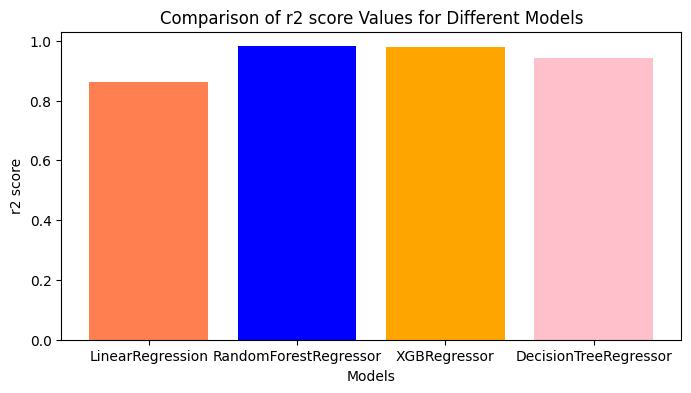

In [32]:
plt.figure(figsize=(8, 4))
plt.bar(model_names, rmse_values, color=['coral', 'blue', 'orange','pink'])
plt.xlabel('Models')
plt.ylabel('r2 score')
plt.title('Comparison of r2 score Values for Different Models')
plt.show()
     

> **RandomForest** and **XGbooster** are giving good performances as their r2 scores are higher compared to other models.